In [12]:
import numpy as np
import pandas as pd
import glob
import os
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

from scipy import stats

In [2]:
def simulate_test_paired(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt,  mean_trt,  sd_trt):
    '''
    Simulate data from two normal distributions and calculate p-value
    from paired t-test
    
        Args: 
        sample sizes, means, and sd's from control and trt groups

        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt = np.random.normal(loc = mean_trt, scale = sd_trt, size = samp_size_trt)
    _, p = stats.ttest_rel(simdata_ctrl, simdata_trt)
    return(p)

In [3]:
def simulate_wilcoxon(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt,  mean_trt,  sd_trt):
    '''
    Simulate data from two normal distributions and calculate p-value
    from paired t-test
    
        Args: 
        sample sizes, means, and sd's from control and trt groups
        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt = np.random.normal(loc = mean_trt, scale = sd_trt, size = samp_size_trt)
    _, p = stats.wilcoxon(simdata_trt, simdata_ctrl, alternative = 'less' , mode = 'approx')
    return(p)

In [4]:
def runPower(control, treatment, nmin, nmax):
    mean_ctrl, sd_ctrl = control
    mean_trt, sd_trt = treatment

    power = []
    for ss in range(nmin,nmax):
        samp_size_ctrl = ss
        samp_size_trt = ss
        # simulate 10000 samples
        
        simulated_pvals = [simulate_wilcoxon(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                     samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]
        p = np.mean(np.array(simulated_pvals) < 0.05)
        power.append(p)
    return(power)

In [5]:
output_fig = r"./dataFolder/SummaryStats_data/elifeRevision/"

# Haltere loading

In [117]:
# to match the stats in paper

hal_df = pd.read_csv('./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5/compiledDataForAggregratePlots.csv')

In [118]:
hal_df.head()

,Unnamed: 0,flyID,wingHz,leftHalHz,rightHalHz,treatment
0,0,fly1,96.904762,97.142857,96.904762,intacthaltere
1,1,fly1,102.130326,102.393484,102.393484,loadedhaltere1
2,2,fly1,112.452700,107.893285,112.125903,loadedhaltere2
3,3,fly1,109.064327,49.968041,109.356725,loadedhaltere3
4,4,fly1,109.064327,109.356725,109.064327,removedload


In [119]:
subset = hal_df[hal_df.treatment == 'loadedhaltere3']
subset

,Unnamed: 0,flyID,wingHz,leftHalHz,rightHalHz,treatment
3,3,fly1,109.064327,49.968041,109.356725,loadedhaltere3
8,8,fly2,85.540184,52.579224,85.552701,loadedhaltere3
13,13,fly3,91.182006,45.245099,91.433747,loadedhaltere3
18,18,fly4,108.919111,62.792650,109.449604,loadedhaltere3
23,23,fly5,90.389140,36.092735,90.532656,loadedhaltere3
28,28,fly8,93.741765,46.934931,93.939394,loadedhaltere3


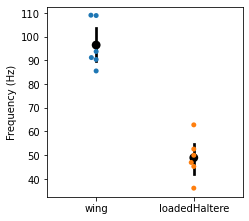

In [120]:
data = pd.DataFrame({'wing': subset.wingHz, 'loadedHaltere': subset.leftHalHz})
f, ax = plt.subplots(figsize = (3.5,3.5))
ax = sns.pointplot(data = data
              ,linestyles = ''
#                 , markers= 
              , color = 'k', 
                  ax = ax)
sns.swarmplot(data = data)
ax.set_ylabel('Frequency (Hz)')
plt.savefig(output_fig + 'haltereLoading.pdf')

In [121]:
stats.wilcoxon(subset.leftHalHz, subset.wingHz, alternative='less', mode = 'approx')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.013853924679039932)

In [17]:
# get my estimated sample size
wing = (np.mean(subset.wingHz), np.std(subset.wingHz))
haltere = (np.mean(subset.leftHalHz), np.std(subset.leftHalHz))

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


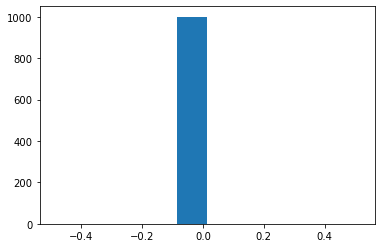

Power for sample size ( 6 6 ) =  1.0


In [18]:
samp_size_ctrl = 6
mean_ctrl, sd_ctrl = wing

samp_size_trt = 6
mean_trt, sd_trt = haltere

# simulate 10000 samples
simulated_pvals = [simulate_wilcoxon(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]

plt.hist(simulated_pvals)
plt.show()

# report power
print("Power for sample size (", samp_size_ctrl, samp_size_trt, ") = ",np.mean(np.array(simulated_pvals) < 0.05))

In [19]:
power = runPower(wing, haltere, 2, 10)

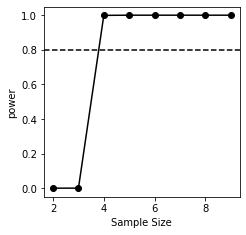

In [21]:
f = plt.figure(figsize = (3.5, 3.5))
plt.plot(range(2,10), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')
plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(output_fig + 'PowerAnalysis_haltereLoading.pdf')

## Epi Ridge Cut

In [107]:
ridge_df = pd.read_csv('./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3/compiledDataForAggregratePlots.csv')

In [108]:
subset = ridge_df[(ridge_df.binned == '(0.6, 0.7]') 
#                   & (ridge_df.flyID != 'fly6')
                 ]
subset

,Unnamed: 0,flyID,treatment,winglength,wingHz,leftHalHz,rightHalHz,binned
7,7,fly2,cutwing2_1,0.62,116.462418,80.912690,117.622549,"(0.6, 0.7]"
13,13,fly3,cutwing2_1,0.65,133.928571,133.988095,133.809524,"(0.6, 0.7]"
19,19,fly5,cutwing2_1,0.63,136.058710,71.784505,104.832561,"(0.6, 0.7]"
24,24,fly6,cutwing2_2,0.64,113.939628,74.407437,128.014706,"(0.6, 0.7]"
29,29,fly7,cutwing2_1,0.61,143.699634,122.206435,144.102564,"(0.6, 0.7]"


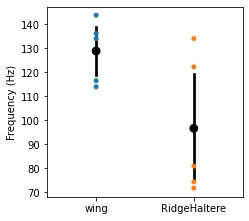

In [109]:
data = pd.DataFrame({'wing': subset.wingHz, 'RidgeHaltere': subset.leftHalHz})
f, ax = plt.subplots(figsize = (3.5, 3.5))
ax = sns.pointplot(data = data
              ,linestyles = ''
              , color = 'k',
                  ax = ax)
sns.swarmplot(data = data)
ax.set_ylabel('Frequency (Hz)')
plt.savefig(output_fig + 'ERidge.pdf')

In [110]:
stats.wilcoxon(subset.leftHalHz, subset.wingHz, alternative='less', mode = 'approx')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=1.0, pvalue=0.03980790073005672)

In [111]:
stats.wilcoxon(subset.rightHalHz, subset.wingHz, alternative='less', mode = 'approx')

WilcoxonResult(statistic=9.0, pvalue=0.6570847827741971)

In [112]:
# get my estimated sample size
wing = (np.mean(subset.wingHz), np.std(subset.wingHz))
ridgeHaltere = (np.mean(subset.leftHalHz), np.std(subset.leftHalHz))

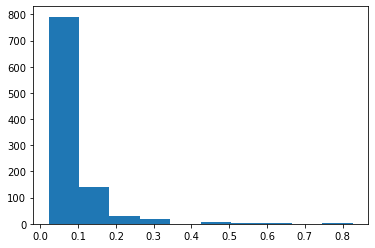

Power for sample size ( 5 5 ) =  0.693


In [116]:
samp_size_ctrl = 5
mean_ctrl, sd_ctrl = wing

samp_size_trt = 5
mean_trt, sd_trt = ridgeHaltere

# simulate 10000 samples
simulated_pvals = [simulate_wilcoxon(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]

plt.hist(simulated_pvals)
plt.show()

# report power
print("Power for sample size (", samp_size_ctrl, samp_size_trt, ") = ",np.mean(np.array(simulated_pvals) < 0.05))

In [114]:
power = runPower(wing, ridgeHaltere, 2, 10)

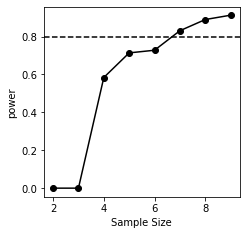

In [115]:
f = plt.figure(figsize = (3.5, 3.5))
plt.plot(range(2,10), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')
plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(output_fig + 'ERidge-PowerAnalysis.pdf')

# Wing Coupling 

In [32]:
direc = r"./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/Figure2/"
Sc = pd.read_csv(direc + 'maxDiffDF.csv')
Sc

,Unnamed: 0,treatment,flyID,winglength,ClippedWingHz,IntactWingHz,binned
0,0,Intact,Fly1,0.391743,84.506527,83.927994,0.3
1,1,Intact,Fly2,1.000000,109.348125,112.487110,0.9
2,2,Intact,Fly3,0.759073,119.158525,119.983680,0.7
3,3,Intact,Fly5,0.620712,117.361145,117.687945,0.6
4,4,Intact,Fly6,0.720811,141.340205,140.790750,0.7
5,5,Intact,Fly7,0.582596,121.059640,120.698435,0.5
6,6,Slit,Fly1,0.617825,150.000000,110.000000,0.6
7,7,Slit,Fly2,0.407029,156.900000,86.270000,0.3
8,8,Slit,Fly7,0.516695,134.600000,84.620000,0.5
9,9,Slit,Fly8,0.453098,145.800000,83.330000,0.3


In [33]:
ctrl = Sc.loc[Sc.treatment == 'Slit', 'IntactWingHz']
trt = Sc.loc[Sc.treatment == 'Slit', 'ClippedWingHz']

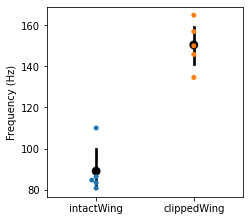

In [34]:
data = pd.DataFrame({'intactWing': ctrl, 'clippedWing': trt})
f, ax = plt.subplots(figsize = (3.5,3.5))
ax = sns.pointplot(data = data
              ,linestyles = ''
              , color = 'k', 
                  ax = ax)
sns.swarmplot(data = data)
ax.set_ylabel('Frequency (Hz)')
plt.savefig(output_fig + 'Sc.pdf')

In [106]:
stats.wilcoxon(ctrl, trt, alternative = 'less', mode = 'approx')

WilcoxonResult(statistic=0.0, pvalue=0.021557223391537678)

In [36]:
# get my estimated sample size
controlWing = (np.mean(ctrl), np.std(ctrl))
clippedWing = (np.mean(trt), np.std(trt))
controlWing, clippedWing

((88.984, 10.664660519679002), (150.44, 10.231832680414591))

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


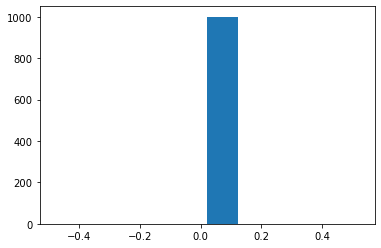

Power for sample size ( 5 5 ) =  1.0


In [37]:
# flipped my control and clipped data to match the alternative less in function simulate wilcoxon
samp_size_ctrl = 5
mean_ctrl, sd_ctrl = clippedWing

samp_size_trt = 5
mean_trt, sd_trt = controlWing

# simulate 10000 samples
simulated_pvals = [simulate_wilcoxon(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                                 samp_size_trt, mean_trt, sd_trt) for ii in range(1000)]

plt.hist(simulated_pvals)
plt.show()

# report power
print("Power for sample size (", samp_size_ctrl, samp_size_trt, ") = ",np.mean(np.array(simulated_pvals) < 0.05))

In [38]:
power = runPower(clippedWing, controlWing, 2, 10)

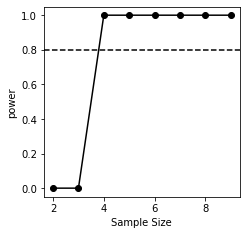

In [39]:
f = plt.figure(figsize = (3.5, 3.5))
plt.plot(range(2,10), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')
plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(output_fig + "Sc-PowerAnalysis.pdf")

# thoracic intergrity - ridge cut 

In [89]:
direc = r"./dataFolder/Submission 3/Final submission/Data to be uploaded to Dryad/delFreq_Figure4/delFreqWithoutLength/"
# direc = r'C:\Users\Tanvi\Dropbox\Coupled oscillator paper\Submission 2\Data to be uploaded to Dryad\delFreq_Figure4\delFreqWithoutLength/'
data = loadmat(direc + 'KruskalWallisPlusMultCompare.mat')
# power test for ANOVA (used on any F stats)

In [90]:
table = pd.read_csv(direc + 'anovaTable.csv')
table.index = table['Source']
table

,Source,SS,df,MS,Chi-sq,Prob>Chi-sq
Source,,,,,,
Groups,Groups,1142.625,3,380.875,19.55879836,0.000209498
Error,Error,317.875,22,14.44886364,[],[]
Total,Total,1460.500,25,[],[],[]


In [91]:
control = data['delFreqWithoutLength'].T[0]
oneRidge = data['delFreqWithoutLength'].T[1][:-2]
twoRidge = data['delFreqWithoutLength'].T[2][:-2]
HaltereAb = data['delFreqWithoutLength'].T[3][:-2]

In [92]:
# stats.kruskal(data['delFreqWithoutLength'].T)
stats.kruskal(control, oneRidge, twoRidge, HaltereAb)

KruskalResult(statistic=19.558798356727166, pvalue=0.00020949826322100518)

In [93]:
def simulate_kruskal(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt1,  mean_trt1,  sd_trt1,
                    samp_size_trt2,  mean_trt2,  sd_trt2,
                    samp_size_trt3,  mean_trt3,  sd_trt3):
    '''
    Simulate data from two normal distributions and calculate p-value
    from paired t-test
    
        Args: 
        sample sizes, means, and sd's from control and trt groups

        Returns:
        p-value from simulated data
    '''
    simdata_ctrl = np.random.normal(loc = mean_ctrl, scale = sd_ctrl, size = samp_size_ctrl)
    simdata_trt1 = np.random.normal(loc = mean_trt1, scale = sd_trt1, size = samp_size_trt1)
    simdata_trt2 = np.random.normal(loc = mean_trt2, scale = sd_trt2, size = samp_size_trt2)
    simdata_trt3 = np.random.normal(loc = mean_trt3, scale = sd_trt3, size = samp_size_trt3)
    
    _, p = stats.kruskal(simdata_ctrl, simdata_trt1, simdata_trt1, simdata_trt1)
    return(p)  

In [94]:
samp_size_ctrl = 8
mean_ctrl = np.nanmean(control)
sd_ctrl = np.nanstd(control)

samp_size_trt1 = 6
mean_trt1 = np.nanmean(oneRidge)
sd_trt1 = np.nanstd(oneRidge)
                    
samp_size_trt2 = 6  
mean_trt2 = np.nanmean(twoRidge)
sd_trt2 = np.nanstd(twoRidge)

samp_size_trt3 = 6
mean_trt3 = np.nanmean(HaltereAb)
sd_trt3 = np.nanstd(HaltereAb)

In [95]:
simulate_kruskal(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt1,  mean_trt1,  sd_trt1,
                    samp_size_trt2,  mean_trt2,  sd_trt2,
                    samp_size_trt3,  mean_trt3,  sd_trt3)

0.028317144990835406

In [96]:
power = []
for ss in range(2,15):
    samp_size_ctrl = ss
    samp_size_trt1 = ss
    samp_size_trt2 = ss
    samp_size_trt3 = ss    
    # simulate 10000 samples
    simulated_pvals = [simulate_kruskal(samp_size_ctrl, mean_ctrl, sd_ctrl, 
                  samp_size_trt1,  mean_trt1,  sd_trt1,
                    samp_size_trt2,  mean_trt2,  sd_trt2,
                    samp_size_trt3,  mean_trt3,  sd_trt3) for ii in range(1000)]
    p = np.mean(np.array(simulated_pvals) < 0.05)
    power.append(p)

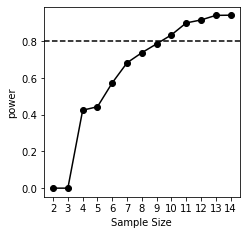

In [97]:
f = plt.figure(figsize = (3.5, 3.5))
plt.plot(range(2,15), power, marker = 'o', color = 'k')
plt.axhline(y = 0.8, linestyle = '--', color = 'k')
# locs, labels = plt.xticks()
plt.xticks(np.arange(2, 15))

plt.ylabel("power")
plt.xlabel('Sample Size')
plt.savefig(output_fig + 'DelFreq-PowerAnalysis.pdf')

In [98]:
power

[0.0,
 0.0,
 0.424,
 0.443,
 0.573,
 0.682,
 0.737,
 0.785,
 0.834,
 0.899,
 0.915,
 0.94,
 0.941]

In [99]:
SSeffect = float(table.loc['Groups', 'SS'])
dfeffect = float(table.loc['Groups', 'df'])
MSerror = float(table.loc['Error', 'MS'])
SStotal = float(table.loc['Total', 'SS'])

# omega_sq = (SSeffect – (dfeffect*MSerror)) / MSerror + SStotal
d = MSerror + SStotal
n = dfeffect*MSerror

omega_sq = (SSeffect - n)/d
omega_sq

0.7452993362543503

In [100]:
import statsmodels.stats.power as power

In [101]:
power.FTestPower().power(omega_sq, 
                             table.loc['Groups', 'df'],
                             table.loc['Error', 'df'],
                             0.05, ncc = 25)

0.14754429870179753